<a href="https://colab.research.google.com/github/Vikramsatrawala/Sonar_Rock-vs-Mine-prediction/blob/main/Stores_Sales_Prediction_Using_Machine_Learning_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VIKRAM SAINI**

# **Stores sales prediction using different machine learning algorithms**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix,precision_score
import seaborn as sns
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

### Import Dataset

In [2]:
df_train = pd.read_csv("/content/Train.csv")
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [3]:
df_train.shape

(8523, 12)

In [4]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df_test = pd.read_csv("/content/Test.csv")
df_test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [6]:
df_test.shape

(5681, 11)

###  Exploratory Data Analysis(EDA)

##### Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Extract numeric columns from dataset
numerics = ['int16', 'int32', 'int64', 'float64']
df_train.select_dtypes(include=numerics)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [10]:
# Extract categorical columns from dataset
categorical = ['object']
df_train.select_dtypes(include=categorical)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [11]:
df_train.nunique() #Check unique values 

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

### Checking Missing Values

In [13]:
df_train.isnull().sum() #Checking missing values for train dataset

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df_test.isnull().sum() #Checking missing values for test dataset 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
df_train.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
missing_percentages = df_train.isnull().sum().sort_values(ascending=False)/len(df_train)
print(missing_percentages)

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64


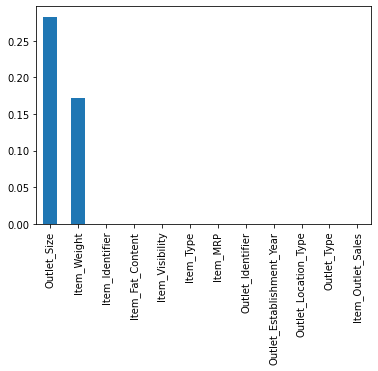

In [17]:
missing_percentages.plot(kind = 'bar')

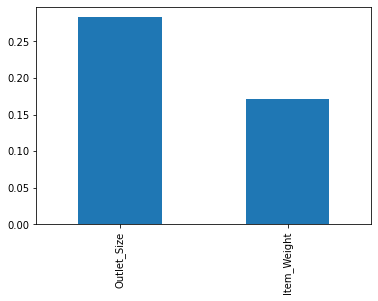

In [18]:
missing_percentages[missing_percentages !=0].plot(kind='bar')

In [19]:
df1 = df_train.Outlet_Size.value_counts()
df1

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
#df1.plot(kind="bar")

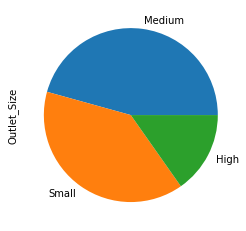

In [21]:
df1.plot(kind="pie")

### Handling Missing Values

In [22]:
# mean value of "Item_Weight" column
df_train['Item_Weight'].mean()

df_test.Item_Weight.mean()
# filling the missing values in "Item_weight column" with "Mean" value
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [23]:
# mode of "Outlet_Size" column
df_train['Outlet_Size'].mode()

df_test.Outlet_Size.mode()
# filling the missing values in "Outlet_Size" column with Mode
#Here we take Outlet_Size column & Outlet_Type column since they are correlated
mode_of_Outlet_size = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)

mode_of_Outlet_size = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [24]:
miss_values = df_train['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [25]:
df_train.loc[miss_values, 'Outlet_Size'] = df_train.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [26]:
# checking for missing values
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
df_train.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',}},inplace=True)
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [29]:
label_encoder = LabelEncoder()
df_train['Item_Identifier'] = label_encoder.fit_transform(df_train['Item_Identifier'])
df_train['Item_Fat_Content'] = label_encoder.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = label_encoder.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier'] = label_encoder.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Size'] = label_encoder.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = label_encoder.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = label_encoder.fit_transform(df_train['Outlet_Type'])

In [30]:
#df_train=pd.get_dummies(df_train, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier'])

In [31]:
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


In [32]:
miss_values = df_test['Outlet_Size'].isnull()
print(miss_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [33]:
df_test.loc[miss_values, 'Outlet_Size'] = df_test.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
df_test.Item_Fat_Content.value_counts()
df_test.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',}},inplace=True)
df_test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [34]:
label_encoder = LabelEncoder()
df_test['Item_Identifier'] = label_encoder.fit_transform(df_test['Item_Identifier'])
df_test['Item_Fat_Content'] = label_encoder.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type'] = label_encoder.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier'] = label_encoder.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Size'] = label_encoder.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type'] = label_encoder.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type'] = label_encoder.fit_transform(df_test['Outlet_Type'])

In [35]:
#df_test = pd.get_dummies(df_test, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier'])

In [36]:
x = df_train.iloc[:,:-1]
Y = df_train.iloc[:,-1] 

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=2)

In [38]:
#feature Scaling     
#st_x= StandardScaler()    
#X_train= st_x.fit_transform(X_train)    
#X_test= st_x.transform(X_test)    

### 1. Multiple Linear Regression Model

In [39]:
#Training the Multiple Linear Regression on training set
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [40]:
#Predicting the Test set results
Pre_Item_Outlet_Sales_test = reg.predict(X_test)
Pre_Item_Outlet_Sales_test

array([2528.05383995, 3625.30926251, 1158.79233766, ..., 2111.72941652,
       4598.25557121, 3455.17062917])

In [41]:
Pre_Item_Outlet_Sales_train = reg.predict(X_train)
Pre_Item_Outlet_Sales_train

array([2412.79920114, 3057.08179773, 3947.60089799, ..., 2448.23503665,
       2236.15045471, 3116.28956971])

In [42]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_test,Pre_Item_Outlet_Sales_test)
print('R^2 value = ', r2_sales)

R^2 value =  0.48912987193626367


In [43]:
r2_sales = metrics.r2_score(Y_train,Pre_Item_Outlet_Sales_train)
print('R^2 value = ', r2_sales)

R^2 value =  0.5071929167339231


### Multiple Linear Regression
Training Dataset - R_squared_value = 0.5071929167339231

  Test Dataset - R_squared_value = 0.48912987193626356

### Item_Outlet_Sales for given test dataset

In [44]:
Item_Outlet_Sales = reg.predict(df_test)
Item_Outlet_Sales

array([1940.60482914, 1064.28865794, 2256.21059255, ..., 1710.96120028,
       3087.14000934, 1095.241947  ])

In [45]:
df_test['Item_Outlet_Sales'] = Item_Outlet_Sales
df_test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,20.75,0,0.007565,13,107.8622,9,1999,1,0,1,1940.604829
1,1067,8.30,1,0.038428,4,87.3198,2,2007,2,1,1,1064.288658
2,1406,14.60,0,0.099575,11,241.7538,0,1998,2,2,0,2256.210593


### 2. Random Forest Regression

In [46]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train,Y_train) 

RandomForestRegressor(random_state=0)

In [47]:
Pre_Item_Outlet_Sales_train = regressor.predict(X_train)
Pre_Item_Outlet_Sales_train

array([1819.185314, 2802.05259 , 3117.40876 , ..., 2543.895298,
       1732.471522, 2229.824122])

In [48]:
r2_sales = metrics.r2_score(Y_train,Pre_Item_Outlet_Sales_train)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.9375399646327137


In [49]:
Pre_Item_Outlet_Sales_test = regressor.predict(X_test)
Pre_Item_Outlet_Sales_test

array([2339.48804 , 2658.07334 , 1642.66176 , ..., 3075.03059 ,
       3233.251302, 3669.829678])

In [50]:
r2_sales = metrics.r2_score(Y_test,Pre_Item_Outlet_Sales_test)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.551554018910545


### Random Forest Regression
Training Dataset - R_squared_value = 0.9375299710100079

Test Dataset     - R_squared_value = 0.5516548447433925

### 3. XGBoost

In [51]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)



[06:18:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [52]:
Pre_Item_Outlet_Sales_train = xgb.predict(X_train)
Pre_Item_Outlet_Sales_train

array([2418.3772, 2746.621 , 4055.5798, ..., 3157.5945, 2403.4163,
       2384.821 ], dtype=float32)

In [53]:
r2_sales = metrics.r2_score(Y_train,Pre_Item_Outlet_Sales_train)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.6364457030941357


In [54]:
r2_sales = metrics.r2_score(Y_test,Pre_Item_Outlet_Sales_test)
print('R_squared_value = ', r2_sales)

R_squared_value =  0.551554018910545


### XGBoost
Training Dataset - R_squared_value = 0.6364457030941357

Test Dataset     - R_squared_value = 0.551554018910545